In [1]:
import sys
sys.path.append("../dataprocessing")
import numpy as np
import os
import PIL
import PIL.Image
from PIL import ImageDraw
import tensorflow as tf
# import tensorflow_datasets as tfds
import pandas as pd
from tqdm import tqdm
import random
import data_process
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
d= cv2.imread('../data/images/눈썹들어올리기/10.0.jpg', cv2.IMREAD_COLOR)

## 함수 정의

In [36]:
def show_img(data, path, landmark_points):    
    img_array = np.fromfile(path, np.uint8)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread('../data/images/눈썹들어올리기/10.0.jpg', cv2.IMREAD_COLOR)
    # landmark_points = landmark_points.iloc[:order]
    drawing_image = img.copy()
    # print(int(float(path.split('/')[4][:-4])))
    # for idx in landmark_points.index:
    #     radius = 2
    #     x = data.loc[int(float(path.split('/')[4][:-4]))][idx[:-1]+"x"]
    #     y = data.loc[int(float(path.split('/')[4][:-4]))][idx]
    #     # print(x,y)
    #     cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=3, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    target_landmark = [point[:-1] for point in landmark_points.index]
    for idx in range(1,len(data.columns),2):
        radius = 2
        x = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx]]
        y = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx+1]]
        # if data.columns[idx] == 'frame':
        #     continue
        if data.columns[idx][:-1] in target_landmark:
            # print(x,y)
            cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius*2, color=(255,255,0), thickness=-1, lineType=cv2.LINE_AA)
        else:
            cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    # img_show(drawing_image)
    # left = landmarks.iloc[order]['left']
    # top = landmarks.iloc[order]['top']
    # right = landmarks.iloc[order]['right']
    # bottom = landmarks.iloc[order]['bottom']
    plt.subplots(figsize=(10,10))
    # cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

In [5]:
def show_diff(data, window):
    diff_df = pd.DataFrame(index=list(set(data.columns) - {'frame','left','top','right','bottom','time_diff'}), columns=['value'])
    for col in data.columns:
        if col in ['frame','left','top','right','bottom','time_diff']:
            continue
        else:
            temp = 0.0
            for start in range(0,len(data.index), window):
                # print(max(data.iloc[start:start+5][col]) - min(data.iloc[start:start+5][col]), max(data.iloc[start:start+5][col]), min(data.iloc[start:start+5][col]))
                temp += max(data.iloc[start:start+5][col]) - min(data.iloc[start:start+5][col])
            diff_df.loc[col] = temp
    return diff_df.sort_values(by='value',ascending=False)

In [31]:
def make_flow_chart(data, diff_df, part, order, image_order, path):
    fig, ax = plt.subplots(figsize = (20,10))
    sort = diff_df.iloc[:order]
    print(sort)
    new_data = data[sort.index]
    # new_data = new_data[[point for point in new_data.columns if str(part) == point.split('-')[0]]]
    temp_plot = sns.lineplot(data = new_data, markers=False, dashes=False)  
    print(path+str(image_order) + '.0.jpg')
    show_img(data, path + str(image_order) + '.0.jpg', sort)
    # ax[idx, col].set_title(str(idx) +" 번 클러스터")
    # if col==0:        
    #     ax[idx, col].set_ylabel(list(custom_sort.keys())[idx])
    #     ax[idx, col].yaxis.label.set_size(20)
    # ax[idx].set_ylabel(list(custom_sort.keys())[idx] + " group")
    # ax[idx].set_xticks(list(range(1,len(seq)+1)))
    # if idx==0:
    #     ax[idx].set_title(str(col+1) +" 주차")
    # for bar in temp_plot.patches:
    #     ax[idx].annotate(int(bar.get_height()), # 천단위 콤마 표시
    #                 (bar.get_x() + bar.get_width() / 2,
    #                 bar.get_height()), ha='center', va='center',
    #                 size=10, xytext=(0, 3),
    #                 textcoords='offset points')
    # for row in data.iterrows():
    #     ax[idx].text(row[0], int(row[1]['quiz']), int(row[1]['quiz']), fontsize=12, ha='center') 
    #     ax[idx].text(row[0], int(row[1]['proj']), int(row[1]['proj']), fontsize=12, ha='center')

> 0은 얼굴 테두리 \
> 1, 2는 왼쪽 눈썹 위, 아래 \
> 3, 4는 오른쪽 눈썹 위, 아래 \
> 5, 6은 왼쪽, 오른쪽 눈 \
> 7, 8은 위쪽 입술 윗부분, 아래부분 \
> 9, 10은 아래쪽 입술 윗부분, 아래부분 \
> 11은 코 세로축 \
> 12는 코 아래부분

## 1. 눈썹 들어올리기

In [37]:
landmarks = pd.read_csv('../data/images/눈썹들어올리기/202208.23123145716.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
diff_list = show_diff(landmarks_cut, 5)
diff_list

,value
5-4y,71.0
0-19y,69.0
0-18y,69.0
5-3y,69.0
0-35y,68.0
...,...
5-7x,35.0
5-8x,35.0
1-4x,35.0
12-0x,35.0


      value
5-4y   71.0
0-19y  69.0
0-18y  69.0
5-3y   69.0
0-35y  68.0
0-1y   68.0
0-16y  68.0
0-17y  68.0
0-2y   67.0
0-0y   67.0
../data/images/눈썹들어올리기/10.0.jpg


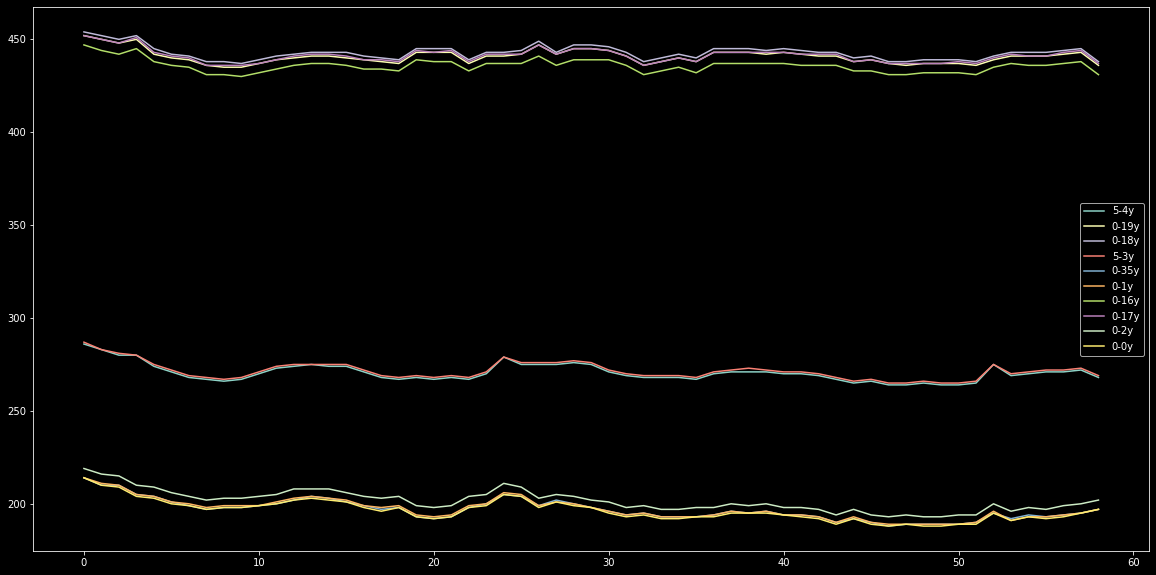

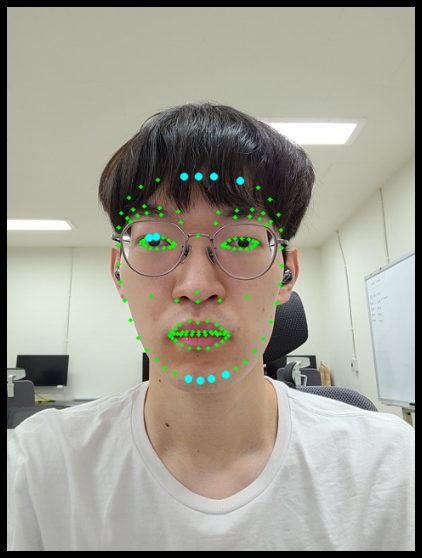

In [38]:
make_flow_chart(part= 1, order = 10, image_order = 10, path= '../data/images/눈썹들어올리기/', data = landmarks_cut, diff_df= diff_list)

## 3. 두 눈 감기

      value
1-2y   86.0
0-31x  80.0
1-1y   80.0
2-2y   80.0
0-29x  79.0
2-1y   79.0
1-3y   79.0
0-30x  78.0
2-3y   77.0
3-3y   75.0
3-1y   74.0
0-32x  74.0
1-4y   73.0
4-1y   73.0
3-2y   73.0
1-0y   72.0
4-2y   71.0
2-0y   71.0
0-28x  69.0
3-0y   68.0
../data/images/두눈감기/20.0.jpg


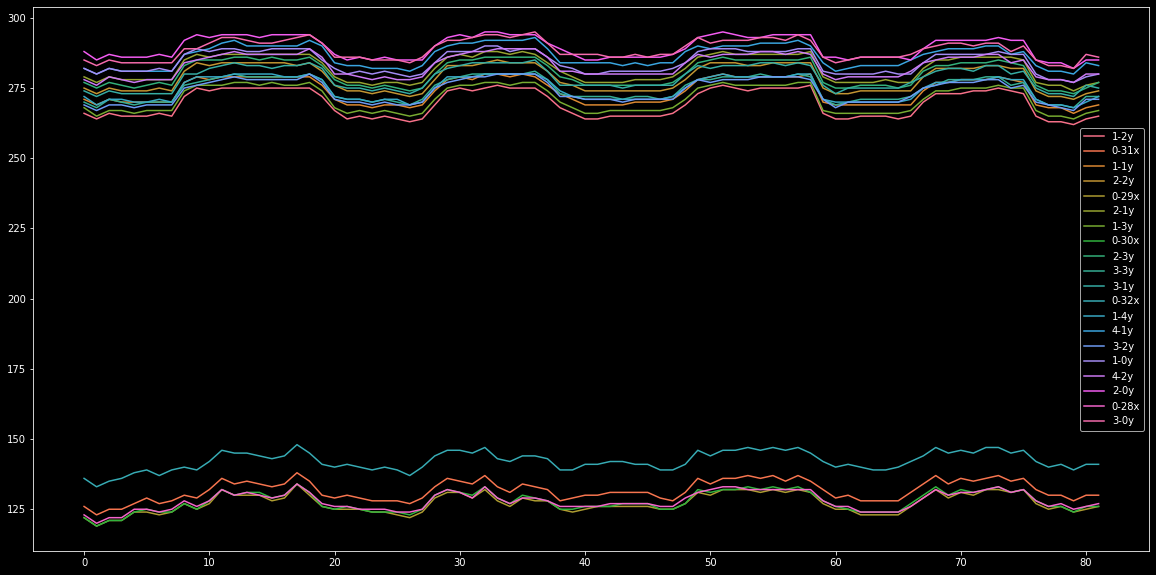

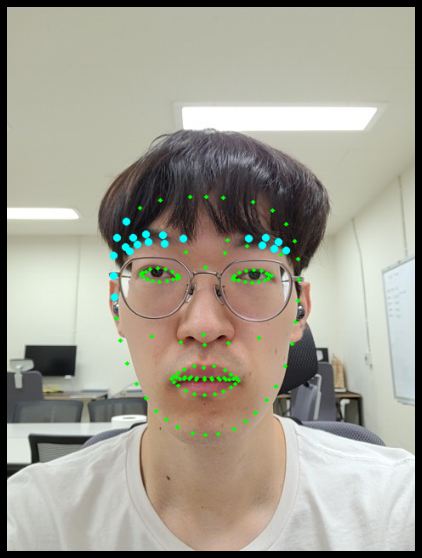

In [47]:
face = '두눈감기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23122651407.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 20, image_order = 20,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

## 4. 두 눈 크게 뜨기

      value
3-2y  172.0
4-2y  170.0
3-3y  164.0
3-1y  163.0
4-3y  161.0
4-1y  156.0
3-4y  153.0
1-3y  144.0
1-4y  139.0
2-3y  139.0
3-0y  136.0
4-4y  136.0
4-0y  136.0
1-2y  136.0
2-2y  132.0
1-1y  131.0
2-1y  128.0
2-4y  125.0
2-0y  109.0
0-2y  107.0
../data/images/두눈크게뜨기/20.0.jpg


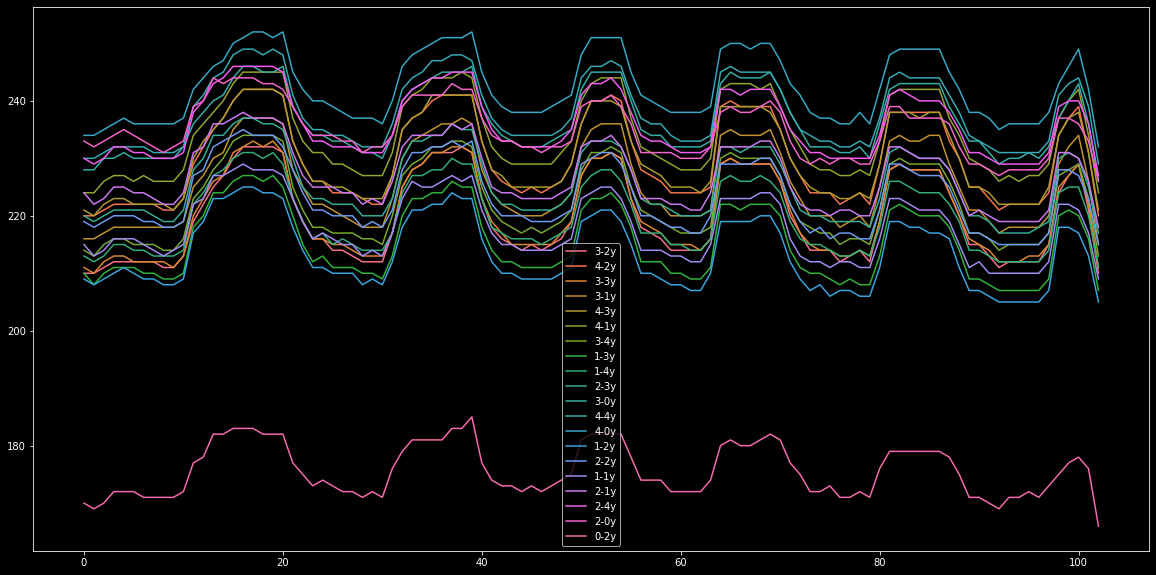

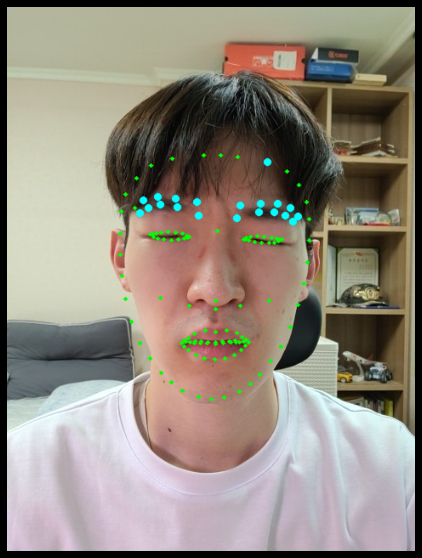

In [49]:
face = '두눈크게뜨기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.20172106650.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 20, image_order = 20,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

## 9. 입벌리기

       value
10-4y  380.0
9-4y   367.0
10-3y  361.0
10-5y  358.0
9-3y   355.0
9-5y   351.0
9-2y   318.0
10-2y  313.0
9-6y   309.0
10-6y  302.0
9-1y   263.0
9-7y   247.0
10-1y  246.0
10-7y  229.0
0-18y  219.0
0-17y  215.0
0-19y  210.0
9-0y   204.0
0-16y  201.0
0-20y  192.0
../data/images/입벌리기/10.0.jpg


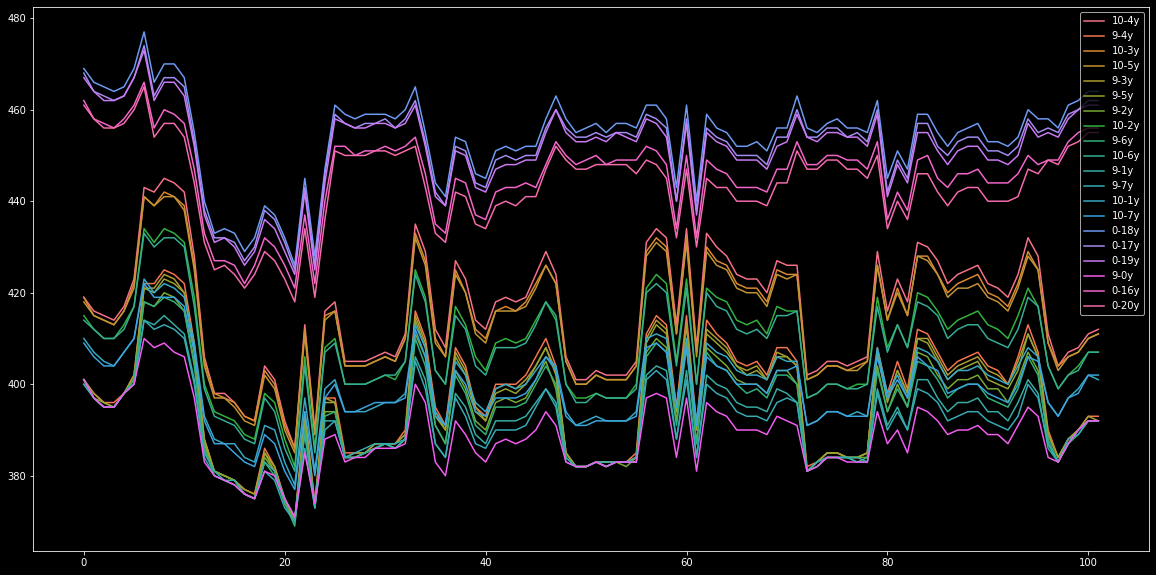

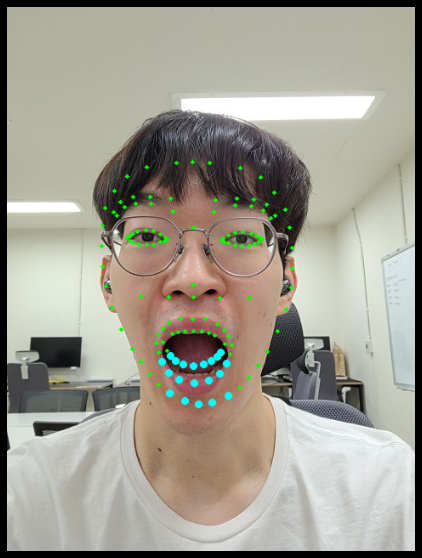

In [52]:
face = '입벌리기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23122709306.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 20, image_order = 10,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

> 입 크게 벌리니까 landmark 인식을 제대로 못함

## 10. 입술 오므리기

       value
8-8x   107.0
8-0x   106.0
0-25y  105.0
0-21y  104.0
0-22y  104.0
0-24y  102.0
0-19y  101.0
7-0x   101.0
0-17y  101.0
0-15y  100.0
0-16y  100.0
0-23y  100.0
0-20y  100.0
7-10x  100.0
0-14y  100.0
0-18y   98.0
10-4y   97.0
0-12y   97.0
0-13y   96.0
0-26y   96.0
../data/images/입술오므리기2/10.0.jpg


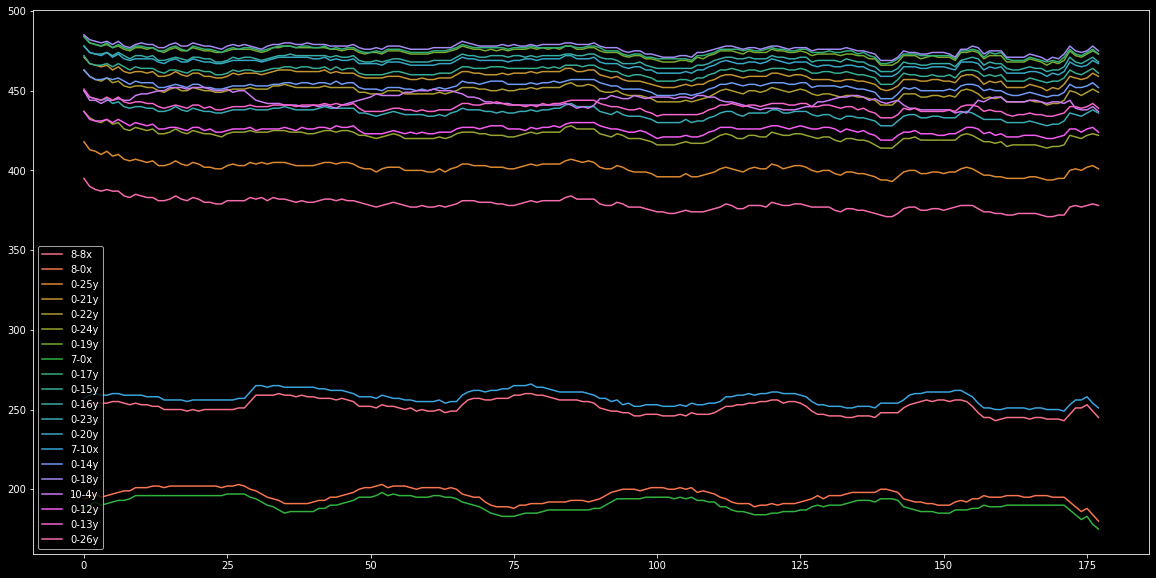

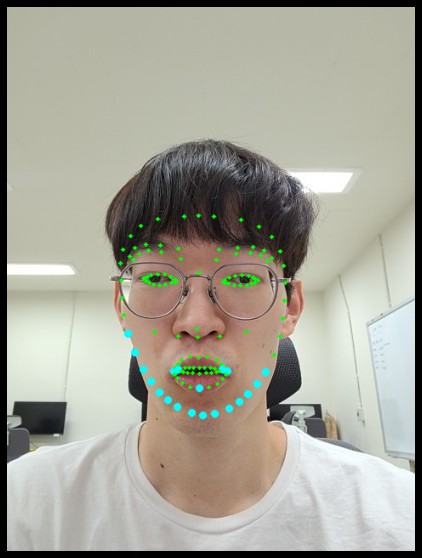

In [56]:
face = '입술오므리기2'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23143251488.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 20, image_order = 10,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)

## 16. 미소짓기

      value
7-0x   75.0
7-1x   72.0
10-8x  72.0
10-4y  71.0
8-0x   70.0
9-4y   67.0
10-5y  67.0
0-18y  66.0
0-19y  65.0
0-17y  65.0
0-15y  64.0
10-7x  64.0
7-2x   64.0
10-3y  64.0
9-3y   64.0
9-5y   63.0
0-21y  63.0
0-16y  63.0
7-1y   63.0
0-20y  62.0
../data/images/미소짓기/20.0.jpg


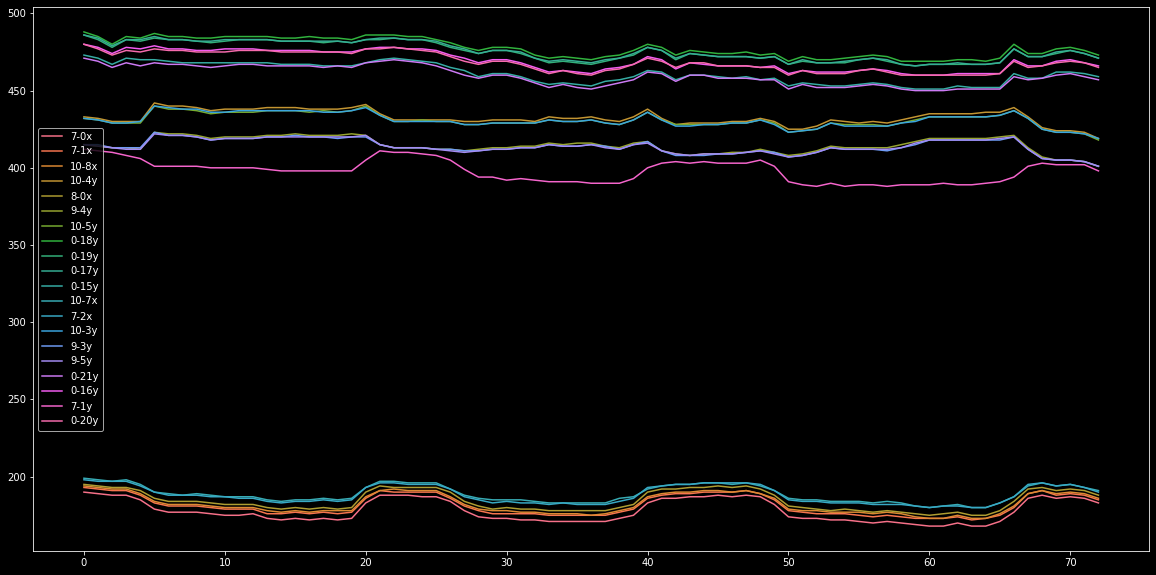

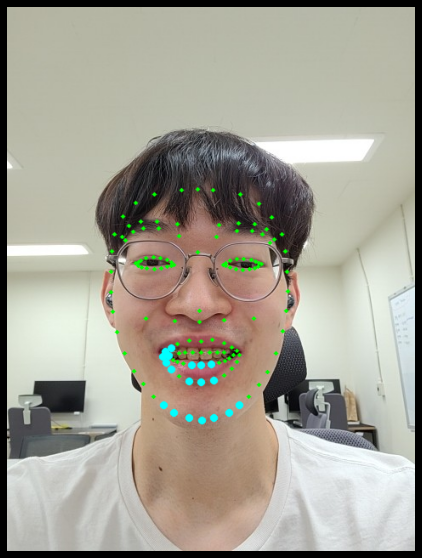

In [55]:
face = '미소짓기'
landmarks = pd.read_csv('../data/images/'+face+'/202208.23122804433.csv')
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
diff_list = show_diff(landmarks_cut, 5)
make_flow_chart(part= 1, order = 20, image_order = 20,
                path= '../data/images/'+face+'/',
                data = landmarks_cut, diff_df= diff_list)